In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
import numpy as np

sns.set(style="whitegrid")

csv_path = "wandb_data/"

In [ ]:
# mnist_score = pd.read_csv(csv_path + "p1o/mnist/score.csv")
# mnist_regret = pd.read_csv(csv_path + "p1o/mnist/regret.csv")
# mnist_loss = pd.read_csv(csv_path + "p1o/mnist/loss.csv")
# mnist_exploration = pd.read_csv(csv_path + "p1o/mnist/exploration.csv")

# mnist = [
#     (mnist_score, 'score'),
#     (mnist_regret, 'regret'),
#     (mnist_loss, 'loss'),
#     (mnist_exploration, 'exploration_rate'),
# ]

# reg_score = pd.read_csv(csv_path + "p1o/reg/score.csv")
# reg_regret = pd.read_csv(csv_path + "p1o_reg_regret.csv")
# reg_loss = pd.read_csv(csv_path + "p1o_reg_loss.csv")
# reg_exploration = pd.read_csv(csv_path + "p1o_reg_exploration.csv")

# reg = [
#     (reg_score, 'score'),
#     (reg_regret, 'regret'),
#     (reg_loss, 'loss'),
#     (reg_exploration, 'exploration_rate'),
# ]

# nn_score = pd.read_csv(csv_path + "p1o_nn_score.csv")
# nn_regret = pd.read_csv(csv_path + "p1o_nn_regret.csv")
# nn_loss = pd.read_csv(csv_path + "p1o_nn_loss.csv")
# nn_exploration = pd.read_csv(csv_path + "p1o_nn_exploration.csv")

# nn = [
#     (nn_score, 'score'),
#     (nn_regret, 'regret'),
#     (nn_loss, 'loss'),
#     (nn_exploration, 'exploration_rate'),
# ]

In [ ]:
metrics = ['score', 'regret', 'loss', 'exploration_rate']
envs = ['reg', 'mnist', 'nn']

data = {}

folder = 'p1o/'
for _env in envs:
    _data = []
    for _metric in metrics:
        path = f'{csv_path}{folder}{_env}/{_metric}.csv'
        df = pd.read_csv(path)
        _data.append((df, _metric))
    data[_env] = _data

reg = data['reg']
mnist = data['mnist']
nn = data['nn']
# print(reg[0]) # score
# print(reg[0][0]) # score df
# print(reg[0][1]) # 'score'

In [ ]:
for dataset in [mnist, reg, nn]:
    for df, metric in dataset:
        cols = [
            (f'noisy_net: true - {metric}', 'yes'),
            (f'noisy_net: true - {metric}__MIN', 'yes__MIN'),
            (f'noisy_net: true - {metric}__MAX', 'yes__MAX'),
            (f'noisy_net: false - {metric}', 'no'),
            (f'noisy_net: false - {metric}__MIN', 'no__MIN'),
            (f'noisy_net: false - {metric}__MAX', 'no__MAX'),
        ]
    
        for old, new in cols:
            if old in df.columns:
                # print(f"Renaming: {old} -> {new}")
                df[new] = df[old]
                df.drop(old, axis=1, inplace=True)
            # else:
            #     print(f"Missing column: {old}")
    
        nan_summary = df[['yes__MIN', 'yes__MAX']].isna().sum()
        print(f"NaNs in {metric} before drop:\n{nan_summary}\n")
        df.dropna(subset=['yes__MIN', 'yes__MAX'], inplace=True)
    
    # for df, metric in mnist:
    #     print(df.head())

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_metric_grid(dataset, title_prefix=""):
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    fig.suptitle(f"{title_prefix} Metrics", fontsize=16)

    metric_map = {
        'score':       (0, 0, 'Score', 'Score', 'lower right'),
        'loss':        (0, 1, 'Loss', 'Loss', 'upper right'),
        'regret':      (1, 0, 'Regret', 'Regret', 'lower right'),
        'exploration_rate': (1, 1, 'Exploration Rate', 'Exploration Rate', 'upper right'),
    }

    for df, metric in dataset:
        row, col, title, ylabel, legend_loc = metric_map[metric]
        ax = axes[row, col]

        sns.lineplot(data=df, x='Step', y='yes', label=f'{metric.capitalize()} NoisyNet', ax=ax)
        # sns.lineplot(data=df, x='Step', y='no', label=f'{metric.capitalize()} Non-NoisyNet', ax=ax)
        ax.fill_between(df['Step'], df['yes__MIN'], df['yes__MAX'], alpha=0.3)

        ax.set_title(title)
        ax.set_xlabel('Step')
        ax.set_ylabel(ylabel)
        ax.grid(True)
        ax.legend(title='Network', loc=legend_loc)

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

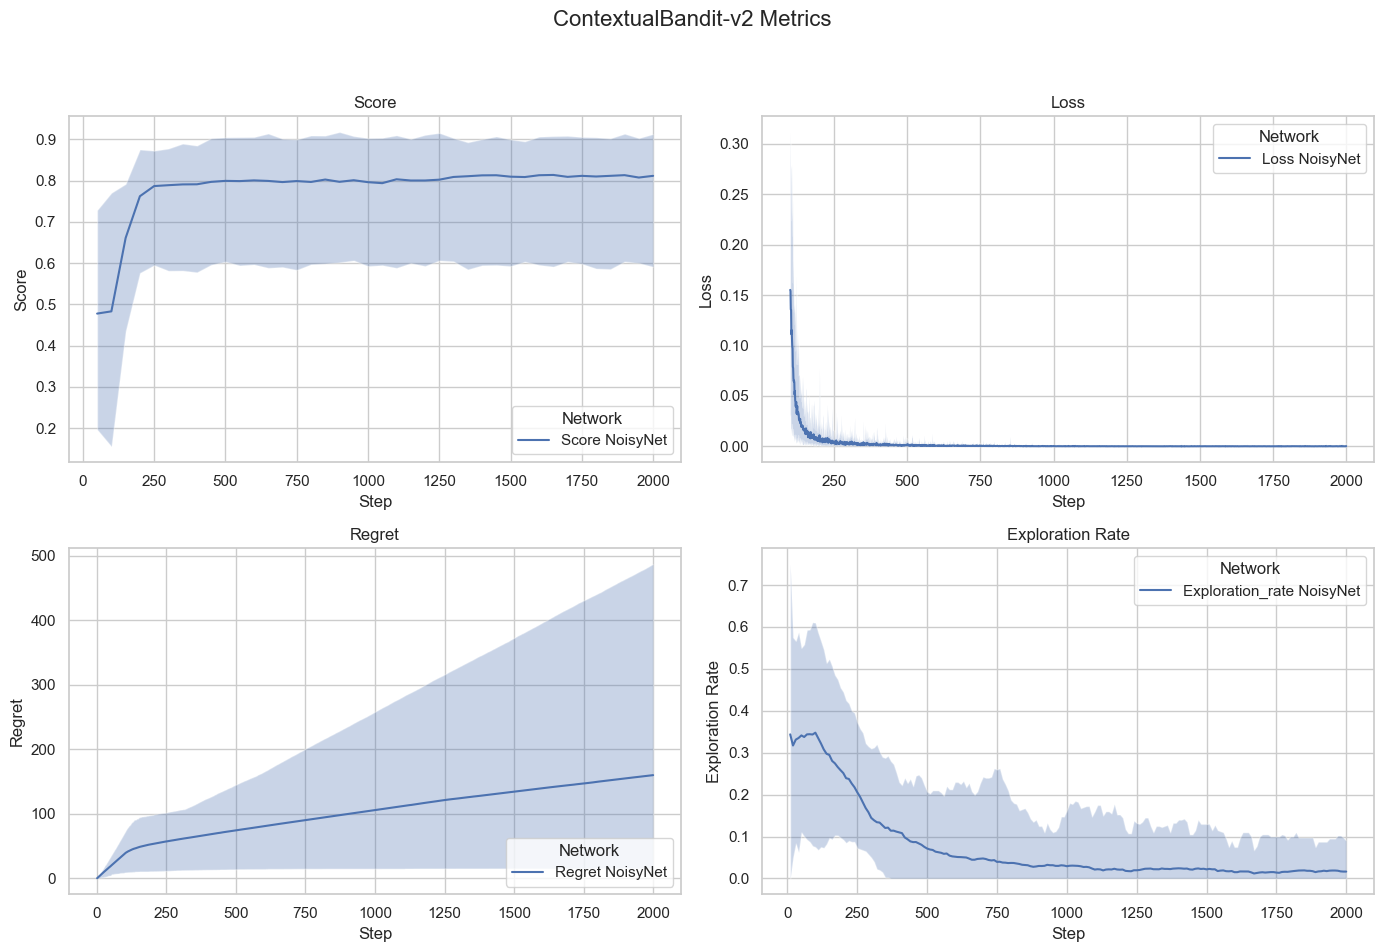

In [6]:
plot_metric_grid(reg, title_prefix="ContextualBandit-v2")

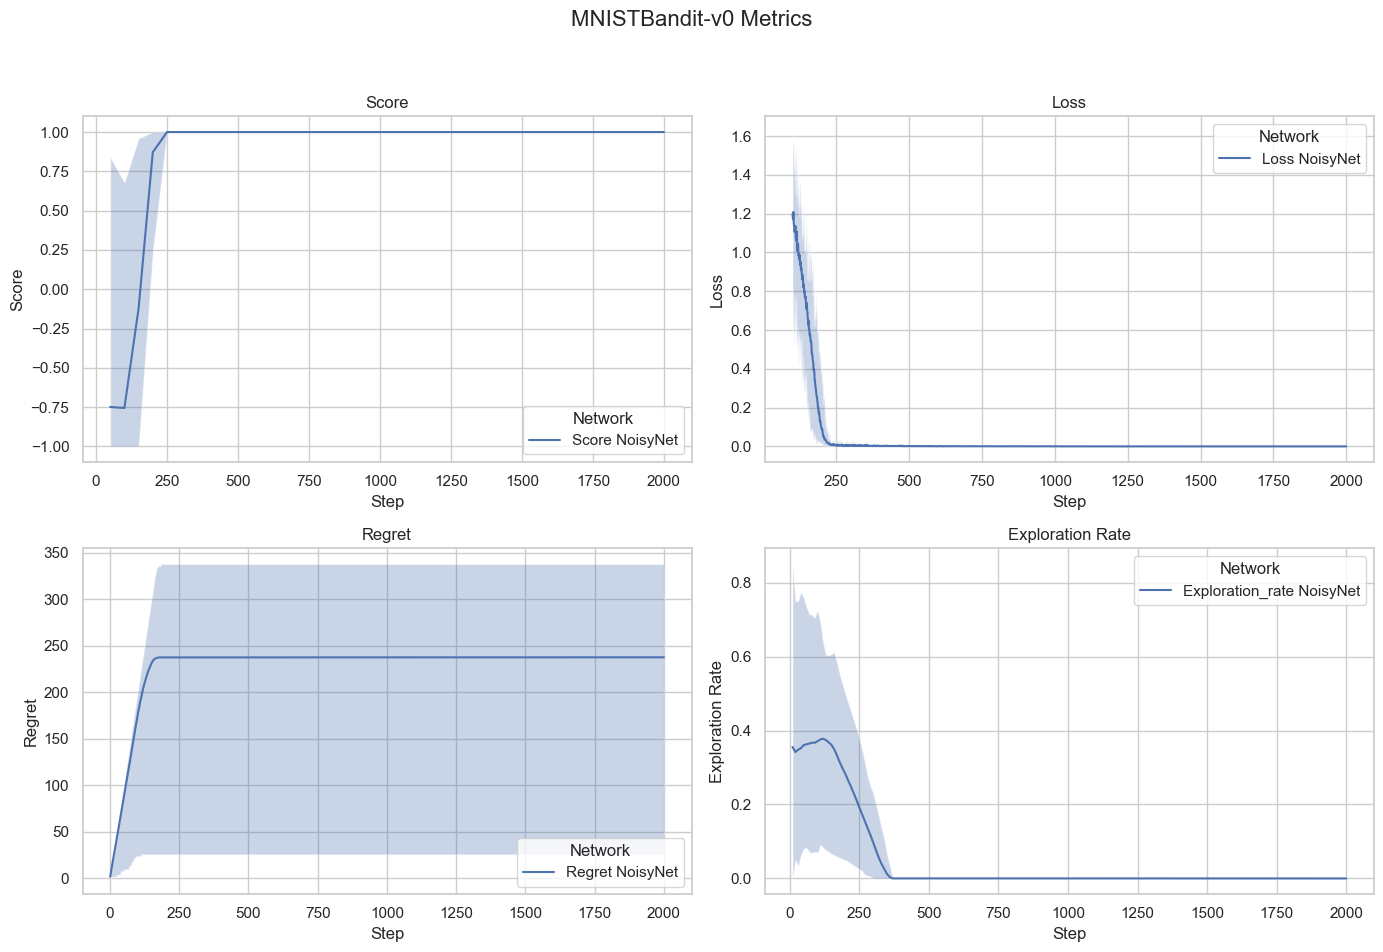

In [7]:
plot_metric_grid(mnist, title_prefix="MNISTBandit-v0")

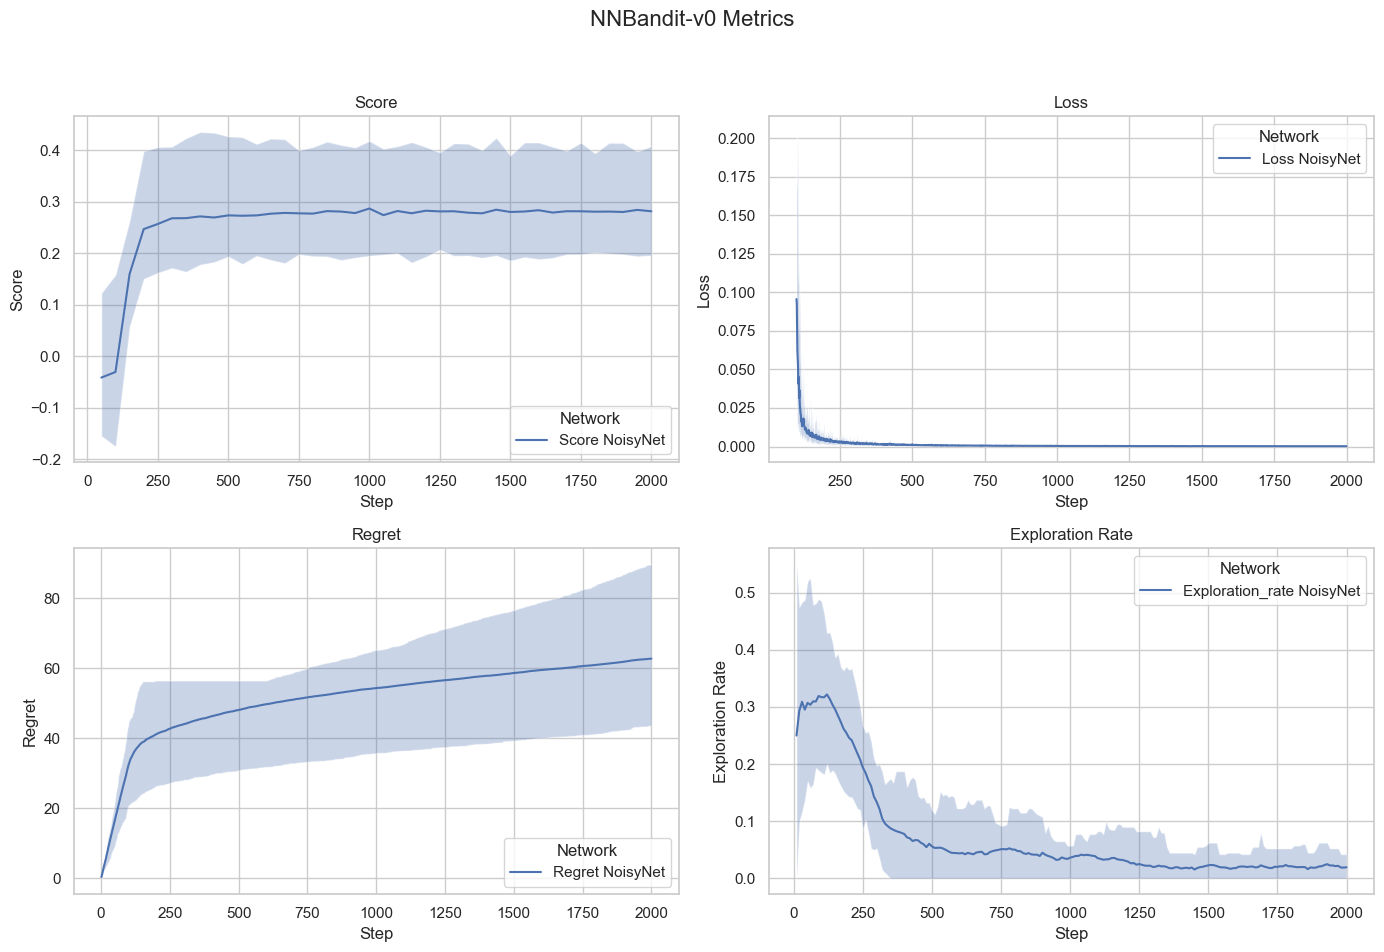

In [8]:
plot_metric_grid(nn, title_prefix="NNBandit-v0")